In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 9.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt; plt.rcdefaults()
import json
import seaborn as sns
from datetime import datetime

from Bio import Entrez

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1 - Plot a bar chart of the number of genes in each SFARI gene-score category (2 marks). 

In [3]:
sfari_genes_path = "/content/drive/MyDrive/Bioinformatics/coursework 2/SFARI-Gene_genes_11-07-2022release_11-09-2022export.csv"

(149, 10)
(1095, 10)
     gene-score
2.0         695
1.0         214
NaN          95
3.0          91
  gene-score  syndromic  counts
1        1.0          1     110
2        1.0          0     104
0        2.0          0     646
5        2.0          1      49
4        3.0          0      82
6        3.0          1       9
3          -          1      94
7          -          0       1
(8, 3)
  gene-score  syndromic  counts
2        1.0          0     104
0        2.0          0     646
4        3.0          0      82
7          -          0       1
  gene-score  syndromic  counts
1        1.0          1     110
5        2.0          1      49
6        3.0          1       9
3          -          1      94


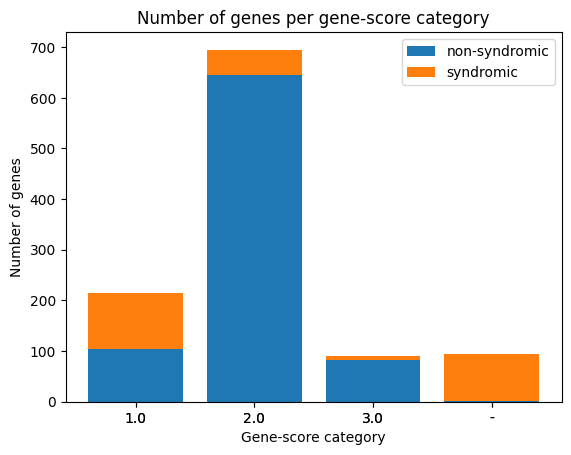

In [10]:
sfari_genes = pd.read_csv(sfari_genes_path)

print(sfari_genes.dropna().shape)
print(sfari_genes.shape)

# print(sfari_genes[["gene-score", "syndromic"]])
print(sfari_genes["gene-score"].value_counts(dropna = False).to_frame())

# Get counts for score-syndrome permutations
counts = sfari_genes[["gene-score", "syndromic"]].value_counts(dropna = False).to_frame()
# Convert back to a useful df
counts = counts.reset_index()
counts.rename(columns={0:"counts"}, inplace=True)
counts["gene-score"] = counts["gene-score"].astype(str)
counts.sort_values(by="gene-score", inplace=True)

counts.replace(to_replace="nan", value="-", inplace=True)
# Debug
print(counts)
print(counts.shape)

# Separate out the 0s and 1s to make stacked bar plot
counts_0 = counts.loc[counts["syndromic"] == 0]
print(counts_0)

counts_1 = counts.loc[counts["syndromic"] == 1]
print(counts_1)

fig, ax = plt.subplots()

ax.bar(counts_0["gene-score"], counts_0["counts"], align='center', label = "non-syndromic")
ax.bar(counts_1["gene-score"], counts_1["counts"], align='center', bottom=counts_0["counts"], label = "syndromic")

ax.set_ylabel('Number of genes')
ax.set_xlabel('Gene-score category')
ax.set_title('Number of genes per gene-score category')
ax.set_xticks(counts["gene-score"].sort_values())
ax.legend()

plt.show()

Task 2 - Rank the genes by ‘number-of-reports’ and find the top 5 SFARI genes that are in gene-score category 1 (2 marks). 

In [ ]:
sfari_genes = pd.read_csv(sfari_genes_path)

print(sfari_genes.columns)

sfari_genes.sort_values(by="number-of-reports", ascending=False, inplace=True)
sfari_genes = sfari_genes.loc[sfari_genes["gene-score"] == 1]
print(sfari_genes.shape)
# print(sfari_genes.head)
print(sfari_genes["gene-name"][0:5])
print(sfari_genes[["gene-symbol" , "syndromic", "number-of-reports"]][0:5])

genes = sfari_genes["gene-symbol"][0:5]

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'eagle',
       'number-of-reports'],
      dtype='object')
(214, 10)
871            SH3 and multiple ankyrin repeat domains 3
554                         Methyl CpG binding protein 2
639                                           neurexin 1
846    sodium channel, voltage-gated, type II, alpha ...
840    sodium channel, voltage-gated, type I, alpha s...
Name: gene-name, dtype: object
    gene-symbol  syndromic  number-of-reports
871      SHANK3          1                120
554       MECP2          1                107
639       NRXN1          0                100
846       SCN2A          0                 96
840       SCN1A          1                 84


Task 3 - For each of these genes find the number of papers in PubMed that include the gene AND are related to Autism (5 marks).

In [ ]:
def search(query):
    Entrez.email = 's1873532@ed.ac.uk'
    handle = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmax='999999999',
                            retmode='xml',
                            term=query)
    results = Entrez.read(handle)
    return results

# results = search("SCN2A AND (autism OR asd)")
# print(results)
# print(json.dumps(results, indent=2))
# print(results["Count"])

# For every gene
gene_publications = pd.DataFrame(columns=['gene','count','IdList'])
for gene in genes:
  # Make query
  query = gene + " AND (autism OR asd)"
  results = search(query)
  gene_publication = {"gene":gene, "count":results["Count"], "IdList":results["IdList"]}
  gene_publications = gene_publications.append(gene_publication, ignore_index=True)
print(gene_publications)

     gene count                                             IdList
0  SHANK3   495  [36038911, 30853900, 35716826, 35608372, 32758...
1   MECP2   524  [35410641, 28785396, 35831173, 34021030, 32539...
2   NRXN1   184  [34487988, 31302032, 33476483, 31515794, 32942...
3   SCN2A   103  [33484493, 35301122, 29929112, 31501495, 32918...
4   SCN1A    82  [34368859, 35351869, 22914087, 33937968, 27653...


Task EXTRA compute correclation between this and the eagle score

Compute and save all genescore 1 publication counts

In [ ]:
def search(query):
    Entrez.email = 's1873532@ed.ac.uk'
    handle = Entrez.esearch(db='pubmed',
                            sort='relevance',
                            retmax='999999999',
                            retmode='xml',
                            term=query)
    results = Entrez.read(handle)
    return results
    
sfari_genes = pd.read_csv(sfari_genes_path)

print(sfari_genes.columns)

sfari_genes.sort_values(by="number-of-reports", ascending=False, inplace=True)
sfari_genes = sfari_genes.loc[sfari_genes["gene-score"] == 1]

genes = sfari_genes["gene-symbol"]

try:
  gene_publications = pd.read_csv("/content/drive/MyDrive/Bioinformatics/coursework 2/gene_publications.csv")
except:
  gene_publications = pd.DataFrame(columns=['gene','count','IdList'])

print(gene_publications.shape)

cond = genes.isin(gene_publications['gene'])
genes.drop(genes[cond].index, inplace=True)

for gene in genes:
  # Make query
  query = gene + " AND (autism OR asd)"
  results = search(query)
  gene_publication = {"gene":gene, "count":results["Count"], "IdList":results["IdList"]}
  gene_publications = gene_publications.append(gene_publication, ignore_index=True)

  gene_publications.to_csv("/content/drive/MyDrive/Bioinformatics/coursework 2/gene_publications.csv")
print(gene_publications)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'eagle',
       'number-of-reports'],
      dtype='object')
(214, 4)
     Unnamed: 0    gene  count  \
0             0  SHANK3    495   
1             1   MECP2    524   
2             2   NRXN1    184   
3             3   SCN2A    103   
4             4   SCN1A     82   
..          ...     ...    ...   
209         209   SRPRA      0   
210         210  NUP155      0   
211         211    TBCK      0   
212         212    GFAP     77   
213         213    UBR1      0   

                                                IdList  
0    ['36038911', '30853900', '35716826', '35608372...  
1    ['35410641', '28785396', '35831173', '34021030...  
2    ['34487988', '31302032', '33476483', '31515794...  
3    ['33484493', '35301122', '29929112', '31501495...  
4    ['34368859', '35351869', '22914087', '33937968...  
..                                                 ..

(110, 10)
     status gene-symbol                                          gene-name  \
871       9      SHANK3          SH3 and multiple ankyrin repeat domains 3   
554       9       MECP2                       Methyl CpG binding protein 2   
639       9       NRXN1                                         neurexin 1   
846       9       SCN2A  sodium channel, voltage-gated, type II, alpha ...   
840       9       SCN1A  sodium channel, voltage-gated, type I, alpha s...   

          ensembl-id chromosome  \
871  ENSG00000251322         22   
554  ENSG00000169057          X   
639  ENSG00000179915          2   
846  ENSG00000136531          2   
840  ENSG00000144285          2   

                                      genetic-category  gene-score  syndromic  \
871  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0          1   
554   Rare Single Gene Mutation, Syndromic, Functional         1.0          1   
639  Rare Single Gene Mutation, Syndromic, Genetic ...         1.0 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


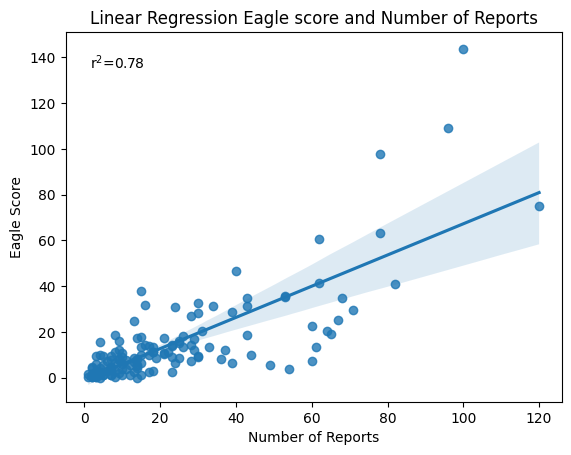

In [ ]:
sfari_genes = pd.read_csv(sfari_genes_path)
gene_publications = pd.read_csv("/content/drive/MyDrive/Bioinformatics/coursework 2/gene_publications.csv")

syndromic = sfari_genes.loc[sfari_genes["gene-score"] == 1]
syndromic = syndromic.loc[syndromic["syndromic"] == 1]
print(syndromic.shape)

sfari_genesa = sfari_genes.join(gene_publications.set_index("gene"),  on="gene-symbol", how="inner")
sfari_genesa.sort_values(by="number-of-reports", ascending=False, inplace=True)
print(sfari_genesa[0:5])

sfari_genes.sort_values(by="eagle", ascending=False, inplace=True)

sfari_genes.dropna(subset=["eagle"], inplace=True)
sfari_genes = sfari_genes.loc[sfari_genes["gene-score"] == 1]

sfari_genes = sfari_genes.join(gene_publications.set_index("gene"),  on="gene-symbol", how="inner")

# print(sfari_genes.head)
# print(sfari_genes.sort_values(by="count", ascending=False))

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(sfari_genes["number-of-reports"], sfari_genes["eagle"])
print(r_value)

plot = sns.regplot(sfari_genes["number-of-reports"], sfari_genes["eagle"])
plot.set(title='Linear Regression Eagle score and Number of Reports')
ax = plt.gca()
ax.text(.05, .9, 'r$^2$={:.2f}'.format(r_value),
            transform=ax.transAxes)
ax.set(xlabel='Number of Reports', ylabel='Eagle Score')
plt.show()



0.5885940900870755


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


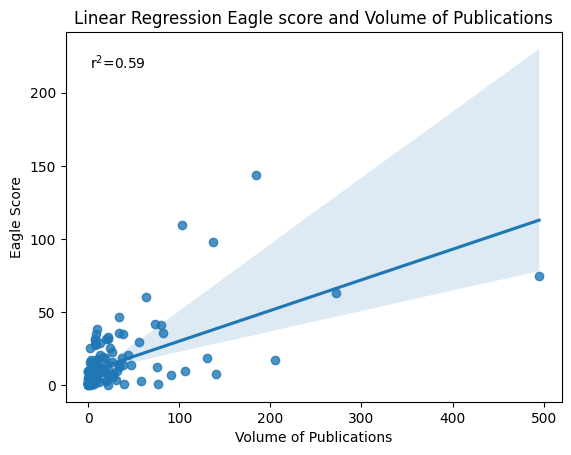

In [ ]:
sfari_genes = pd.read_csv(sfari_genes_path)
gene_publications = pd.read_csv("/content/drive/MyDrive/Bioinformatics/coursework 2/gene_publications.csv")

sfari_genes.sort_values(by="eagle", ascending=False, inplace=True)

sfari_genes.dropna(subset=["eagle"], inplace=True)
sfari_genes = sfari_genes.loc[sfari_genes["gene-score"] == 1]

sfari_genes = sfari_genes.join(gene_publications.set_index("gene"),  on="gene-symbol", how="inner")

sfari_genes.drop(sfari_genes.loc[sfari_genes["gene-symbol"] == "SON"].index, inplace=True)
# sfari_genes.drop(sfari_genes.loc[sfari_genes["count"] == 0].index, inplace=True)
# sns.regplot(sfari_genes["count"], sfari_genes["eagle"])

# slope, intercept, r_value, p_value, std_err = sp.stats.linregress(sfari_genes["count"], sfari_genes["eagle"])
# print(r_value)


slope, intercept, r_value, p_value, std_err = sp.stats.linregress(sfari_genes["count"], sfari_genes["eagle"])
print(r_value)

plot = sns.regplot(sfari_genes["count"], sfari_genes["eagle"])
plot.set(title='Linear Regression Eagle score and Volume of Publications')
ax = plt.gca()
ax.text(.05, .9, 'r$^2$={:.2f}'.format(r_value),
            transform=ax.transAxes)
ax.set(xlabel='Volume of Publications', ylabel='Eagle Score')
plt.show()

Task 4 - From these data fill a table with genes as rows and paper count by year as column (3 marks). [clarification - ideally for all years, but OK to do for the last 10 complete years]

In [ ]:
def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 's1873532@ed.ac.uk'
    handle = Entrez.esummary(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results

publication_year_list = pd.DataFrame(columns=['gene','year'])
# Fetch all publications per gene and extract their date
for gene in genes:
  # Make query
  gene_publication = gene_publications.loc[gene_publications["gene"] == gene]
  print(gene)
  ids = gene_publication["IdList"]
  ids = ids.iloc[0]
  print(len(ids))
  publications = fetch_details(ids)
  print(len(publications))

  for publication in publications:
    # print(len(publication))
    # print(publication)
    year = publication["PubDate"][0:4]
    publication_year_list = publication_year_list.append({"gene":gene, "year":int(year)}, ignore_index=True)

print(publication_year_list)

SHANK3
495
495
MECP2
524
524
NRXN1
184
184
SCN2A
103
103
SCN1A
82
82
        gene  year
0     SHANK3  2022
1     SHANK3  2019
2     SHANK3  2022
3     SHANK3  2022
4     SHANK3  2020
...      ...   ...
1383   SCN1A  2011
1384   SCN1A  2017
1385   SCN1A  2012
1386   SCN1A  2021
1387   SCN1A  1993

[1388 rows x 2 columns]


In [ ]:
publication_year_list_working = publication_year_list

publication_year_list_working = pd.pivot_table(publication_year_list_working, index=['gene'],
                    columns=['year'], aggfunc=len)



# Debug
print(publication_year_list_working)

# PIVOTING
cols = pd.DataFrame(columns=range(1993, 2024))
print(cols)
missing = cols.drop(columns=publication_year_list_working.columns)
print(missing)

publication_year_list_working[missing.columns] = None

publication_year_list_working.sort_values(by="year", axis = 1, inplace = True)

publication_year_list_working = publication_year_list_working.drop(columns=2023)
publication_year_list_working = publication_year_list_working.drop(columns=2022)

print(publication_year_list_working)

year    1993  1999  2000  2001  2002  2003  2004  2005  2006  2007  ...  2014  \
gene                                                                ...         
MECP2    3.0   1.0   7.0   3.0   9.0   8.0   9.0  16.0  11.0  19.0  ...  38.0   
NRXN1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  ...  16.0   
SCN1A    1.0   NaN   NaN   NaN   NaN   1.0   2.0   1.0   NaN   NaN  ...   2.0   
SCN2A    NaN   NaN   NaN   NaN   NaN   1.0   2.0   NaN   NaN   NaN  ...   5.0   
SHANK3   1.0   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   4.0  ...  32.0   

year    2015  2016  2017  2018  2019  2020  2021  2022  2023  
gene                                                          
MECP2   44.0  45.0  33.0  22.0  33.0  28.0  20.0  26.0   NaN  
NRXN1   16.0   6.0  10.0   9.0  18.0  10.0  10.0  12.0   NaN  
SCN1A    5.0   3.0   5.0   6.0   8.0  11.0  13.0  10.0   NaN  
SCN2A    4.0   7.0   7.0  11.0  16.0   9.0  19.0  15.0   NaN  
SHANK3  26.0  40.0  37.0  49.0  44.0  53.0  63.0  71.0

Task 5 - Plot a single stacked histogram displaying the data from the table (3 marks).

Index(['1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'],
      dtype='object', name='year')


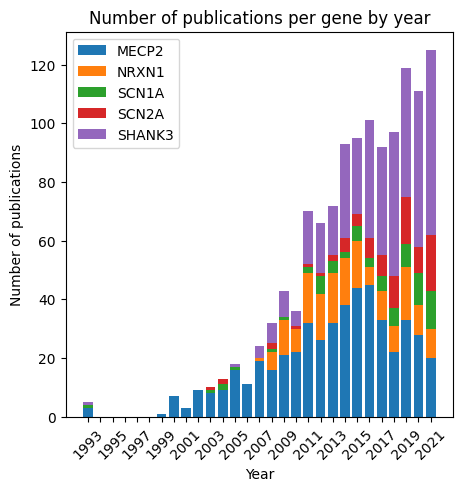

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

year_list = publication_year_list_working.columns.astype(str)

year_list_int = publication_year_list_working.columns

print(year_list)

MECP2 = publication_year_list_working.loc["MECP2"].fillna(0)
NRXN1 = publication_year_list_working.loc["NRXN1"].fillna(0)
SCN1A = publication_year_list_working.loc["SCN1A"].fillna(0)
SCN2A = publication_year_list_working.loc["SCN2A"].fillna(0)
SHANK3 = publication_year_list_working.loc["SHANK3"].fillna(0)

ax.bar(year_list, MECP2, align='center', label = "MECP2")
ax.bar(year_list, NRXN1, bottom=MECP2, align='center', label = "NRXN1")
ax.bar(year_list, SCN1A, bottom=MECP2.add(NRXN1), align='center', label = "SCN1A")
ax.bar(year_list, SCN2A, bottom=MECP2.add(NRXN1).add(SCN1A), align='center', label = "SCN2A")
ax.bar(year_list, SHANK3, bottom=MECP2.add(NRXN1).add(SCN1A).add(SCN2A), align='center', label = "SHANK3")
# ax.bar(counts_1["gene-score"], counts_1["counts"], align='center', bottom=counts_0["counts"], label = "syndromatic")

ax.set_ylabel('Number of publications')
ax.set_xlabel('Year')
ax.set_title('Number of publications per gene by year')
ax.set_xticklabels([x if x % 2 else "" for x in year_list_int], rotation = 45)
ax.legend()

plt.show()

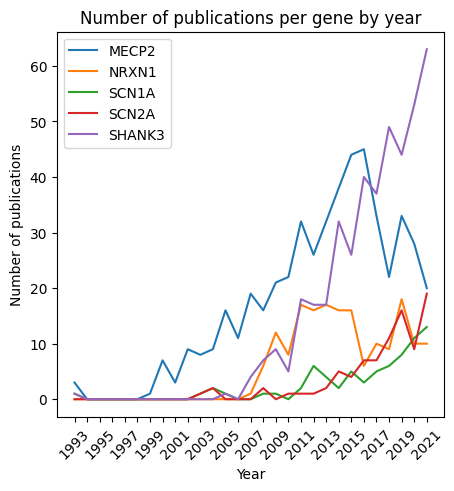

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

year_list = publication_year_list_working.columns.astype(str)

MECP2 = publication_year_list_working.loc["MECP2"].fillna(0)
NRXN1 = publication_year_list_working.loc["NRXN1"].fillna(0)
SCN1A = publication_year_list_working.loc["SCN1A"].fillna(0)
SCN2A = publication_year_list_working.loc["SCN2A"].fillna(0)
SHANK3 = publication_year_list_working.loc["SHANK3"].fillna(0)

ax.plot(year_list, MECP2, label = "MECP2")
ax.plot(year_list, NRXN1, label = "NRXN1")
ax.plot(year_list, SCN1A, label = "SCN1A")
ax.plot(year_list, SCN2A, label = "SCN2A")
ax.plot(year_list, SHANK3, label = "SHANK3")
# ax.bar(counts_1["gene-score"], counts_1["counts"], align='center', bottom=counts_0["counts"], label = "syndromatic")

ax.set_ylabel('Number of publications')
ax.set_xlabel('Year')
ax.set_title('Number of publications per gene by year')
ax.set_xticklabels([x if x % 2 else "" for x in year_list_int], rotation = 45)
ax.legend()

plt.show()